In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [107]:
data = pd.read_excel("C:/Users/Anvesh Bandi/Desktop/DATASETS/bankruptcy_data.xlsx")

In [108]:
data.head()

,compname,NIC,Prowesscode,Industry type,Year,compyear,sales,operatingprofits,PBDIT,netprofitmargin,...,dscr,cashtocurentassets,rawmat_turnover,wip_turnover,fingood_turnover,creditors_turnover,emp_utilisation,ncfo,currentassets,currentliabilities
0,20 Microns Ltd.,8,11,1,2000,20 Microns Ltd.X2000,354,90,25,9,...,2.27,0.11,1.32,NaN,NaN,NaN,NaN,NaN,NaN,78.2
1,20 Microns Ltd.,8,11,1,2001,20 Microns Ltd.X2001,442,93,21,5,...,2.00,0.09,1.51,NaN,NaN,NaN,NaN,NaN,NaN,89.1
2,20 Microns Ltd.,8,11,1,2002,20 Microns Ltd.X2002,402,63,15,2,...,1.57,0.10,1.49,NaN,NaN,NaN,NaN,NaN,NaN,107.0
3,20 Microns Ltd.,8,11,1,2003,20 Microns Ltd.X2003,462,46,11,-2,...,1.28,0.09,1.89,NaN,NaN,NaN,NaN,43.1,NaN,97.8
4,20 Microns Ltd.,8,11,1,2004,20 Microns Ltd.X2004,534,54,9,-10,...,1.57,0.09,2.32,NaN,NaN,NaN,NaN,17.4,NaN,81.0


In [122]:
data.isnull().sum()

compname               0
NIC                    0
Prowesscode            0
Industry type          0
Year                   0
                      ..
emp_utilisation        0
ncfo                   0
currentassets          0
currentliabilities     0
class                 98
Length: 61, dtype: int64

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3808 entries, 47 to 37114
Data columns (total 61 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   compname                  3808 non-null   object 
 1   NIC                       3808 non-null   int64  
 2   Prowesscode               3808 non-null   int64  
 3   Industry type             3808 non-null   int64  
 4   Year                      3808 non-null   int64  
 5   compyear                  3808 non-null   object 
 6   sales                     3808 non-null   object 
 7   operatingprofits          3808 non-null   object 
 8   PBDIT                     3808 non-null   object 
 9   netprofitmargin           3808 non-null   object 
 10  totalassets               3808 non-null   object 
 11  longtermborrowings        3808 non-null   object 
 12  networkingcaptial         3808 non-null   object 
 13  retainedprofitsandlosses  3808 non-null   object 
 14  profit

In [124]:
data.dropna(inplace = True)

In [125]:
data.isnull().sum()

compname              0
NIC                   0
Prowesscode           0
Industry type         0
Year                  0
                     ..
emp_utilisation       0
ncfo                  0
currentassets         0
currentliabilities    0
class                 0
Length: 61, dtype: int64

In [126]:
data.bsegroup.value_counts()

B     1605
A     1031
X      827
XT     194
Z       53
Name: bsegroup, dtype: int64

In [127]:
def get_target(bsegroup):
    if bsegroup == 'XD' or bsegroup == 'XT'  or bsegroup =='Z' or bsegroup =='ZP' or bsegroup == 'X':
        return '1'
    elif bsegroup == 'A' or bsegroup == 'B':
        return '0'

In [128]:
data['class'] = data['bsegroup'].apply(get_target)

In [129]:
data['class'].value_counts()

0    2636
1    1074
Name: class, dtype: int64

# For only 5 ALTMAN variables

In [130]:
import warnings
warnings.filterwarnings("ignore")

In [131]:
X = data[['liquidity(X1)', 'profitability(X2)','productivity(X3)','leverage(X4)',"assetturnover(X5)"]]
Y = data['class']

<AxesSubplot:>

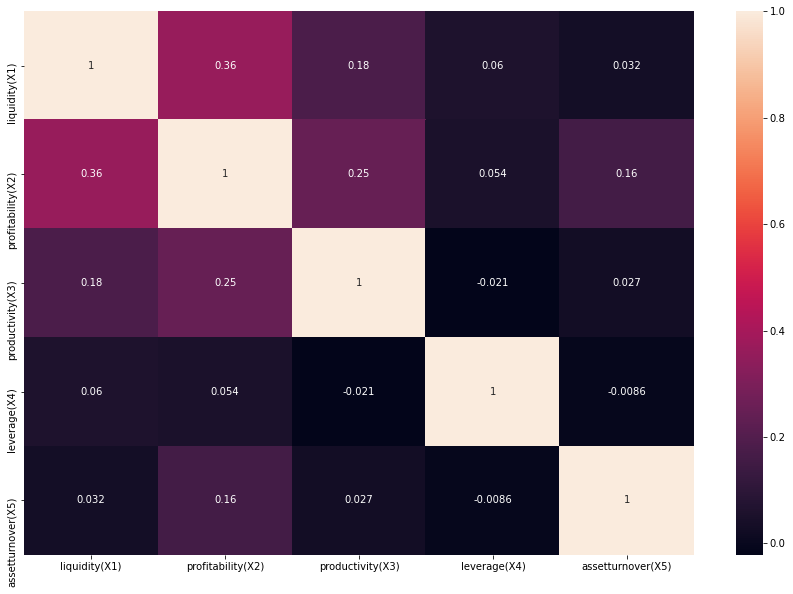

In [132]:
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.heatmap(X.corr(), annot=True)

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.3, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((2597, 5), (1113, 5), (2597,), (1113,))

In [134]:
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix
#Logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
predictions_logreg = model.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, Y_test)*100))

#Confusion Matrix
Confusion_Matrix_Log_Reg= confusion_matrix(Y_test, predictions_logreg)
print('confusion matrix of Logistic Regression:')
print(Confusion_Matrix_Log_Reg)

sensitivity = Confusion_Matrix_Log_Reg[0,0]/(Confusion_Matrix_Log_Reg[0,0]+Confusion_Matrix_Log_Reg[0,1])
print('Sensitivity : ', sensitivity )

specificity = Confusion_Matrix_Log_Reg[1,1]/(Confusion_Matrix_Log_Reg[1,0]+Confusion_Matrix_Log_Reg[1,1])
print('Specificity : ', specificity)


from sklearn.metrics import classification_report
#Classification Report
print(classification_report(Y_test,predictions_logreg))


Accuracy of logistic regression classifier on test set: 73.67
confusion matrix of Logistic Regression:
[[797   9]
 [284  23]]
Sensitivity :  0.988833746898263
Specificity :  0.0749185667752443
              precision    recall  f1-score   support

           0       0.74      0.99      0.84       806
           1       0.72      0.07      0.14       307

    accuracy                           0.74      1113
   macro avg       0.73      0.53      0.49      1113
weighted avg       0.73      0.74      0.65      1113



In [135]:
from sklearn.svm import SVC
SVM = SVC(kernel = 'rbf', random_state = 1, probability=True)
SVM.fit(X_train, Y_train)

predictions_SVM = SVM.predict(X_test)


print('Accuracy of SVM on test set:{:.2f}'.format(SVM.score(X_test, Y_test)*100))

#Confusion Matrix
Confusion_Matrix_SVM= confusion_matrix(Y_test, predictions_SVM)
print('confusion matrix of SVM:')
print(Confusion_Matrix_SVM)


sensitivity = Confusion_Matrix_SVM[0,0]/(Confusion_Matrix_SVM[0,0]+Confusion_Matrix_SVM[0,1])
print('Sensitivity : ', sensitivity )

specificity = Confusion_Matrix_SVM[1,1]/(Confusion_Matrix_SVM[1,0]+Confusion_Matrix_SVM[1,1])
print('Specificity : ', specificity)



from sklearn.metrics import classification_report

#Classification Report
print(classification_report(Y_test,predictions_SVM))

Accuracy of SVM on test set:72.42
confusion matrix of SVM:
[[806   0]
 [307   0]]
Sensitivity :  1.0
Specificity :  0.0
              precision    recall  f1-score   support

           0       0.72      1.00      0.84       806
           1       0.00      0.00      0.00       307

    accuracy                           0.72      1113
   macro avg       0.36      0.50      0.42      1113
weighted avg       0.52      0.72      0.61      1113



In [136]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)

predictions_dtree= dtree.predict(X_test)
predictions_dtree

print('Accuracy of Decision Trees on test set: {:.2f}'.format(dtree.score(X_test, Y_test)*100))


#Confusion Matrix
Confusion_Matrix_dtree= confusion_matrix(Y_test, predictions_dtree)
print('confusion matrix of Decision Trees:')
print(Confusion_Matrix_dtree)

#Specificity & Sensitivity

sensitivity = Confusion_Matrix_dtree[0,0]/(Confusion_Matrix_dtree[0,0]+Confusion_Matrix_dtree[0,1])
print('Sensitivity : ', sensitivity )

specificity = Confusion_Matrix_dtree[1,1]/(Confusion_Matrix_dtree[1,0]+Confusion_Matrix_dtree[1,1])
print('Specificity : ', specificity)

from sklearn.metrics import classification_report

#Classification Report
print(classification_report(Y_test,predictions_dtree))

Accuracy of Decision Trees on test set: 83.02
confusion matrix of Decision Trees:
[[691 115]
 [ 74 233]]
Sensitivity :  0.8573200992555832
Specificity :  0.758957654723127
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       806
           1       0.67      0.76      0.71       307

    accuracy                           0.83      1113
   macro avg       0.79      0.81      0.80      1113
weighted avg       0.84      0.83      0.83      1113



In [137]:
from sklearn.ensemble import RandomForestClassifier

r_clf = RandomForestClassifier(n_estimators=100)
r_clf.fit(X_train, Y_train)

predictions_r_clf= r_clf.predict(X_test)
predictions_r_clf

print('Accuracy of Random Forest on test set: {:.2f}'.format(r_clf.score(X_test, Y_test)*100))


#Confusion Matrix
Confusion_Matrix_r_clf= confusion_matrix(Y_test, predictions_r_clf)
print('confusion matrix of Random Classifier:')
print(Confusion_Matrix_r_clf)

#Specificity & Sensitivity

sensitivity = Confusion_Matrix_r_clf[0,0]/(Confusion_Matrix_r_clf[0,0]+Confusion_Matrix_r_clf[0,1])
print('Sensitivity : ', sensitivity )

specificity = Confusion_Matrix_r_clf[1,1]/(Confusion_Matrix_r_clf[1,0]+Confusion_Matrix_r_clf[1,1])
print('Specificity : ', specificity)

from sklearn.metrics import classification_report

#Classification Report
print(classification_report(Y_test,predictions_r_clf))

Accuracy of Random Forest on test set: 87.42
confusion matrix of Random Classifier:
[[734  72]
 [ 68 239]]
Sensitivity :  0.9106699751861043
Specificity :  0.7785016286644951
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       806
           1       0.77      0.78      0.77       307

    accuracy                           0.87      1113
   macro avg       0.84      0.84      0.84      1113
weighted avg       0.87      0.87      0.87      1113



In [138]:
from sklearn.ensemble import AdaBoostClassifier


ADAB_clf = AdaBoostClassifier(n_estimators=100)
ADAB_clf.fit(X_train, Y_train)

predictions_ADAB_clf= ADAB_clf.predict(X_test)
predictions_ADAB_clf

print('Accuracy of AdaBoost Classifier on test set: {:.2f}'.format(ADAB_clf.score(X_test, Y_test)*100))


#Confusion Matrix
Confusion_Matrix_ADAB_clf= confusion_matrix(Y_test, predictions_ADAB_clf)
print('confusion matrix of AdaBoost Classifier:')
print(Confusion_Matrix_ADAB_clf)

#Specificity & Sensitivity

sensitivity = Confusion_Matrix_ADAB_clf[0,0]/(Confusion_Matrix_ADAB_clf[0,0]+Confusion_Matrix_ADAB_clf[0,1])
print('Sensitivity : ', sensitivity )

specificity = Confusion_Matrix_ADAB_clf[1,1]/(Confusion_Matrix_ADAB_clf[1,0]+Confusion_Matrix_ADAB_clf[1,1])
print('Specificity : ', specificity)

from sklearn.metrics import classification_report

#Classification Report
print(classification_report(Y_test,predictions_ADAB_clf))

Accuracy of AdaBoost Classifier on test set: 86.79
confusion matrix of AdaBoost Classifier:
[[736  70]
 [ 77 230]]
Sensitivity :  0.913151364764268
Specificity :  0.749185667752443
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       806
           1       0.77      0.75      0.76       307

    accuracy                           0.87      1113
   macro avg       0.84      0.83      0.83      1113
weighted avg       0.87      0.87      0.87      1113



In [139]:
import xgboost as xgb


XGB_clf = xgb.XGBClassifier(n_estimators=100)
XGB_clf.fit(X_train, Y_train)

predictions_XGB_clf= XGB_clf.predict(X_test)
predictions_XGB_clf

print('Accuracy of XGBoost Classifier on test set: {:.2f}'.format(XGB_clf.score(X_test, Y_test)*100))


#Confusion Matrix
Confusion_Matrix_XGB_clf= confusion_matrix(Y_test, predictions_XGB_clf)
print('confusion matrix of XGBBoost Classifier:')
print(Confusion_Matrix_XGB_clf)

#Specificity & Sensitivity

sensitivity = Confusion_Matrix_XGB_clf[0,0]/(Confusion_Matrix_XGB_clf[0,0]+Confusion_Matrix_XGB_clf[0,1])
print('Sensitivity : ', sensitivity )

specificity = Confusion_Matrix_XGB_clf[1,1]/(Confusion_Matrix_XGB_clf[1,0]+Confusion_Matrix_XGB_clf[1,1])
print('Specificity : ', specificity)

from sklearn.metrics import classification_report

#Classification Report
print(classification_report(Y_test,predictions_XGB_clf))

Accuracy of XGBoost Classifier on test set: 86.70
confusion matrix of XGBBoost Classifier:
[[732  74]
 [ 74 233]]
Sensitivity :  0.9081885856079405
Specificity :  0.758957654723127
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       806
           1       0.76      0.76      0.76       307

    accuracy                           0.87      1113
   macro avg       0.83      0.83      0.83      1113
weighted avg       0.87      0.87      0.87      1113



In [175]:
#ANN

from sklearn.neural_network import MLPClassifier

ANN_clf = MLPClassifier(hidden_layer_sizes=(5,5,5),activation='relu', solver='adam')
ANN_clf.fit(X_train, Y_train)

predictions_ANN_clf= ANN_clf.predict(X_test)
predictions_ANN_clf

print('Accuracy of ANN Classifier on test set: {:.2f}'.format(ANN_clf.score(X_test, Y_test)*100))


#Confusion Matrix
Confusion_Matrix_ANN_clf= confusion_matrix(Y_test, predictions_ANN_clf)
print('confusion matrix of ANN Classifier:')
print(Confusion_Matrix_ANN_clf)

#Specificity & Sensitivity

sensitivity = Confusion_Matrix_ANN_clf[0,0]/(Confusion_Matrix_ANN_clf[0,0]+Confusion_Matrix_ANN_clf[0,1])
print('Sensitivity : ', sensitivity )

specificity = Confusion_Matrix_ANN_clf[1,1]/(Confusion_Matrix_ANN_clf[1,0]+Confusion_Matrix_ANN_clf[1,1])
print('Specificity : ', specificity)

from sklearn.metrics import classification_report

#Classification Report
print(classification_report(Y_test,predictions_ANN_clf))

Accuracy of ANN Classifier on test set: 74.93
confusion matrix of ANN Classifier:
[[788  18]
 [261  46]]
Sensitivity :  0.9776674937965261
Specificity :  0.1498371335504886
              precision    recall  f1-score   support

           0       0.75      0.98      0.85       806
           1       0.72      0.15      0.25       307

    accuracy                           0.75      1113
   macro avg       0.73      0.56      0.55      1113
weighted avg       0.74      0.75      0.68      1113



In [141]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, Y_train)

predictions_LDA= LDA.predict(X_test)
predictions_LDA

print('Accuracy of LDA on test set: {:.2f}'.format(LDA.score(X_test, Y_test)*100))


#Confusion Matrix
Confusion_Matrix_LDA= confusion_matrix(Y_test, predictions_LDA)
print('confusion matrix of LDA Classifier:')
print(Confusion_Matrix_LDA)

#Specificity & Sensitivity

sensitivity = Confusion_Matrix_LDA[0,0]/(Confusion_Matrix_LDA[0,0]+Confusion_Matrix_LDA[0,1])
print('Sensitivity : ', sensitivity )

specificity = Confusion_Matrix_LDA[1,1]/(Confusion_Matrix_LDA[1,0]+Confusion_Matrix_LDA[1,1])
print('Specificity : ', specificity)

from sklearn.metrics import classification_report

#Classification Report
print(classification_report(Y_test,predictions_LDA))

Accuracy of LDA on test set: 78.98
confusion matrix of LDA Classifier:
[[793  13]
 [221  86]]
Sensitivity :  0.9838709677419355
Specificity :  0.28013029315960913
              precision    recall  f1-score   support

           0       0.78      0.98      0.87       806
           1       0.87      0.28      0.42       307

    accuracy                           0.79      1113
   macro avg       0.83      0.63      0.65      1113
weighted avg       0.81      0.79      0.75      1113



In [142]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier()
bag.fit(X_train, Y_train)

predictions_BAG_clf= bag.predict(X_test)
predictions_BAG_clf

print('Accuracy of Bagging Classifier on test set: {:.2f}'.format(bag.score(X_test, Y_test)*100))


#Confusion Matrix
Confusion_Matrix_bag_clf= confusion_matrix(Y_test, predictions_BAG_clf)
print('confusion matrix of Bagging Classifier:')
print(Confusion_Matrix_bag_clf)

#Specificity & Sensitivity

sensitivity = Confusion_Matrix_bag_clf[0,0]/(Confusion_Matrix_bag_clf[0,0]+Confusion_Matrix_bag_clf[0,1])
print('Sensitivity : ', sensitivity )

specificity = Confusion_Matrix_bag_clf[1,1]/(Confusion_Matrix_bag_clf[1,0]+Confusion_Matrix_bag_clf[1,1])
print('Specificity : ', specificity)

from sklearn.metrics import classification_report

#Classification Report
print(classification_report(Y_test,predictions_BAG_clf))

Accuracy of Bagging Classifier on test set: 86.79
confusion matrix of Bagging Classifier:
[[743  63]
 [ 84 223]]
Sensitivity :  0.9218362282878412
Specificity :  0.7263843648208469
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       806
           1       0.78      0.73      0.75       307

    accuracy                           0.87      1113
   macro avg       0.84      0.82      0.83      1113
weighted avg       0.87      0.87      0.87      1113



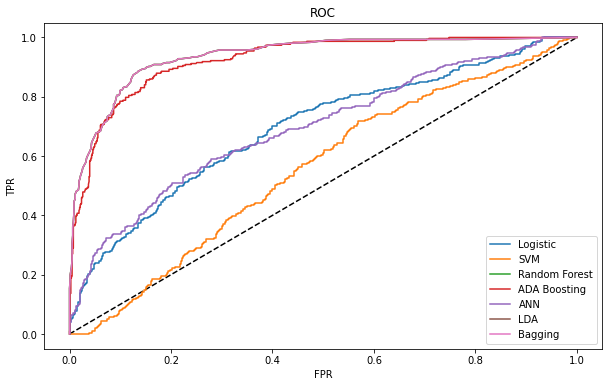

In [181]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc


#Logistic Regression
Y_pred_prob = model.predict_proba(X_test)[:,1]
fprlog, tprlog, thresholds = roc_curve(Y_test.astype(int), Y_pred_prob)
roc_auc = auc(fprlog, tprlog)

#SVM
Y_pred_prob_SVM = SVM.predict_proba(X_test)[:,1]
fprSVM, tprSVM, thresholdsSVM = roc_curve(Y_test.astype(int),Y_pred_prob_SVM)
roc_aucSVM = auc(fprSVM, tprSVM)

#Random Forest
Y_pred_prob_RAND = r_clf.predict_proba(X_test)[:,1]
fprRAND, tprRAND, thresholdsRAND = roc_curve(Y_test.astype(int), Y_pred_prob_RAND)
roc_aucRAND = auc(fprRAND, tprRAND)

#ADA Boosting
Y_pred_prob_ADA = ADAB_clf.predict_proba(X_test)[:,1]
fprADA, tprADA, thresholdsADA = roc_curve(Y_test.astype(int), Y_pred_prob_ADA)
roc_aucADA = auc(fprADA, tprADA)

#Artificial Neural Network
Y_pred_prob_ANN =  ANN_clf.predict_proba(X_test)[:,1]
fprANN, tprANN, thresholdsANN = roc_curve(Y_test.astype(int), Y_pred_prob_ANN)
roc_aucANN = auc(fprANN, tprANN)

#Linear Discriminant Analysis
Y_pred_prob_LDA = LDA.predict_proba(X_test)[:,1]
fprLDA, tprLDA, thresholdsLDA = roc_curve(Y_test.astype(int),Y_pred_prob_RAND)
roc_aucLDA = auc(fprLDA, tprLDA)

#Bagging
Y_pred_prob_BAG = bag.predict_proba(X_test)[:,1]
fprBAG, tprBAG, thresholdsBAG = roc_curve(Y_test.astype(int), Y_pred_prob_RAND)
roc_aucBAG = auc(fprBAG, tprBAG)

plt.figure(figsize=(10,6))
plt.plot([0,1],[0,1], 'k--')
plt.plot(fprlog, tprlog, label= "Logistic")
plt.plot(fprSVM, tprSVM, label= "SVM")
plt.plot(fprRAND, tprRAND, label= "Random Forest")
plt.plot(fprADA, tprADA, label= "ADA Boosting")
plt.plot(fprANN, tprANN, label= "ANN")
plt.plot(fprLDA, tprLDA, label= "LDA")
plt.plot(fprBAG, tprBAG, label= "Bagging")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('ROC')
plt.show()

# For 11 variables

In [53]:
X1 = data[['liquidity(X1)', 'profitability(X2)','productivity(X3)','leverage(X4)',"assetturnover(X5)",'operationalmargin(OM)','growthassets(GA)','growthsales(GS)','growthemployees(GE)','CROE', 'CPB']]
Y1 = data['class']

<AxesSubplot:>

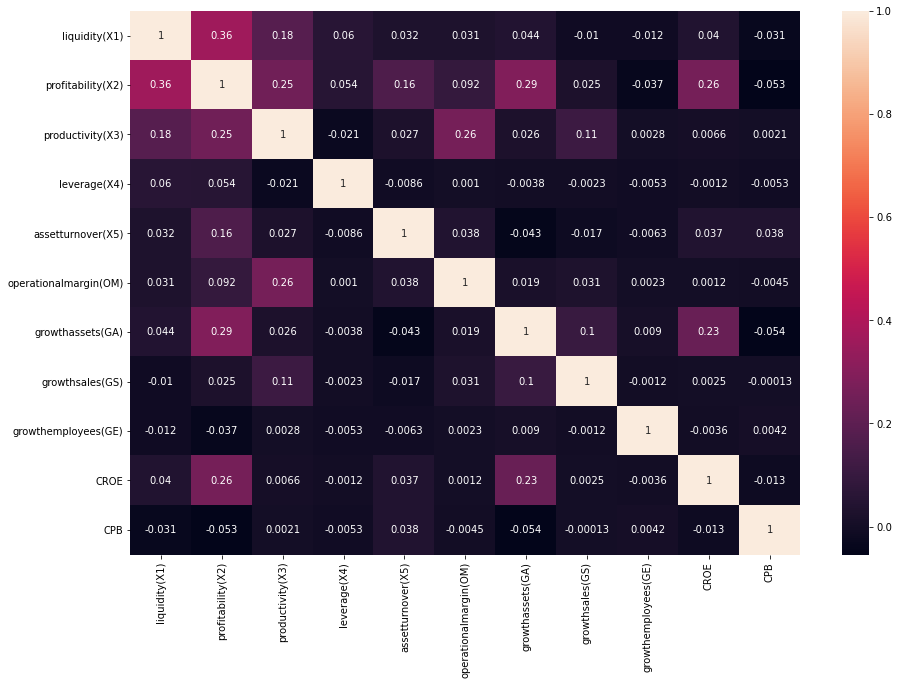

In [54]:
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.heatmap(X1.corr(), annot=True)

In [56]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1, test_size=.3, random_state=42)
X1_train.shape, X1_test.shape, Y1_train.shape, Y1_test.shape

((2597, 11), (1113, 11), (2597,), (1113,))

In [57]:
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix

#Logistic regression
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X1_train,Y1_train)
predictions_logreg1 = model1.predict(X1_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model1.score(X1_test, Y1_test)*100))

#Confusion Matrix
Confusion_Matrix_Log_Reg1= confusion_matrix(Y1_test, predictions_logreg1)
print('confusion matrix of Logistic Regression:')
print(Confusion_Matrix_Log_Reg1)

sensitivity = Confusion_Matrix_Log_Reg1[0,0]/(Confusion_Matrix_Log_Reg1[0,0]+Confusion_Matrix_Log_Reg1[0,1])
print('Sensitivity : ', sensitivity )

specificity = Confusion_Matrix_Log_Reg1[1,1]/(Confusion_Matrix_Log_Reg1[1,0]+Confusion_Matrix_Log_Reg1[1,1])
print('Specificity : ', specificity)


from sklearn.metrics import classification_report
#Classification Report
print(classification_report(Y1_test,predictions_logreg1))


Accuracy of logistic regression classifier on test set: 73.76
confusion matrix of Logistic Regression:
[[799   7]
 [285  22]]
Sensitivity :  0.9913151364764268
Specificity :  0.07166123778501629
              precision    recall  f1-score   support

           0       0.74      0.99      0.85       806
           1       0.76      0.07      0.13       307

    accuracy                           0.74      1113
   macro avg       0.75      0.53      0.49      1113
weighted avg       0.74      0.74      0.65      1113



In [61]:
from sklearn.svm import SVC
SVM1 = SVC(kernel = 'rbf', random_state = 1, probability=True)
SVM1.fit(X1_train, Y1_train)

predictions_SVM1 = SVM1.predict(X1_test)


print('Accuracy of SVM1 on test set:{:.2f}'.format(SVM1.score(X1_test, Y1_test)*100))

#Confusion Matrix
Confusion_Matrix_SVM1 = confusion_matrix(Y1_test, predictions_SVM1)
print('confusion matrix of SVM1:')
print(Confusion_Matrix_SVM1)


sensitivity = Confusion_Matrix_SVM1[0,0]/(Confusion_Matrix_SVM1[0,0]+Confusion_Matrix_SVM1[0,1])
print('Sensitivity : ', sensitivity )

specificity = Confusion_Matrix_SVM1[1,1]/(Confusion_Matrix_SVM1[1,0]+Confusion_Matrix_SVM1[1,1])
print('Specificity : ', specificity)



from sklearn.metrics import classification_report

#Classification Report
print(classification_report(Y1_test,predictions_SVM1))

Accuracy of SVM1 on test set:72.42
confusion matrix of SVM1:
[[806   0]
 [307   0]]
Sensitivity :  1.0
Specificity :  0.0
              precision    recall  f1-score   support

           0       0.72      1.00      0.84       806
           1       0.00      0.00      0.00       307

    accuracy                           0.72      1113
   macro avg       0.36      0.50      0.42      1113
weighted avg       0.52      0.72      0.61      1113



In [63]:
from sklearn.tree import DecisionTreeClassifier
dtree1 = DecisionTreeClassifier()
dtree1.fit(X1_train, Y1_train)

predictions_dtree1= dtree1.predict(X1_test)
predictions_dtree1

print('Accuracy of Decision Trees 1 on test set: {:.2f}'.format(dtree1.score(X1_test, Y1_test)*100))


#Confusion Matrix
Confusion_Matrix_dtree1= confusion_matrix(Y1_test, predictions_dtree1)
print('confusion matrix of Decision Trees 1:')
print(Confusion_Matrix_dtree1)

#Specificity & Sensitivity

sensitivity = Confusion_Matrix_dtree1[0,0]/(Confusion_Matrix_dtree1[0,0]+Confusion_Matrix_dtree1[0,1])
print('Sensitivity : ', sensitivity )

specificity = Confusion_Matrix_dtree1[1,1]/(Confusion_Matrix_dtree1[1,0]+Confusion_Matrix_dtree1[1,1])
print('Specificity : ', specificity)

from sklearn.metrics import classification_report

#Classification Report
print(classification_report(Y1_test,predictions_dtree1))

Accuracy of Decision Trees 1 on test set: 82.57
confusion matrix of Decision Trees 1:
[[703 103]
 [ 91 216]]
Sensitivity :  0.8722084367245657
Specificity :  0.7035830618892508
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       806
           1       0.68      0.70      0.69       307

    accuracy                           0.83      1113
   macro avg       0.78      0.79      0.78      1113
weighted avg       0.83      0.83      0.83      1113



In [64]:
from sklearn.ensemble import RandomForestClassifier

r_clf1 = RandomForestClassifier(n_estimators=100)
r_clf1.fit(X1_train, Y1_train)

predictions_r_clf1= r_clf1.predict(X1_test)
predictions_r_clf1

print('Accuracy of Random Forest 1 on test set: {:.2f}'.format(r_clf1.score(X1_test, Y1_test)*100))


#Confusion Matrix
Confusion_Matrix_r_clf1= confusion_matrix(Y1_test, predictions_r_clf1)
print('confusion matrix of 1 Random Classifier:')
print(Confusion_Matrix_r_clf1)

#Specificity & Sensitivity

sensitivity = Confusion_Matrix_r_clf1[0,0]/(Confusion_Matrix_r_clf1[0,0]+Confusion_Matrix_r_clf1[0,1])
print('Sensitivity : ', sensitivity )

specificity = Confusion_Matrix_r_clf1[1,1]/(Confusion_Matrix_r_clf1[1,0]+Confusion_Matrix_r_clf1[1,1])
print('Specificity : ', specificity)

from sklearn.metrics import classification_report

#Classification Report
print(classification_report(Y1_test,predictions_r_clf1))

Accuracy of Random Forest 1 on test set: 88.41
confusion matrix of 1 Random Classifier:
[[747  59]
 [ 70 237]]
Sensitivity :  0.9267990074441688
Specificity :  0.7719869706840391
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       806
           1       0.80      0.77      0.79       307

    accuracy                           0.88      1113
   macro avg       0.86      0.85      0.85      1113
weighted avg       0.88      0.88      0.88      1113



In [100]:
from sklearn.ensemble import AdaBoostClassifier

ADAB_clf1 = AdaBoostClassifier(n_estimators=100)
ADAB_clf1.fit(X1_train, Y1_train)

predictions_ADAB_clf1= ADAB_clf1.predict(X1_test)
predictions_ADAB_clf1

print('Accuracy of AdaBoost Classifier 1 on test set: {:.2f}'.format(ADAB_clf1.score(X1_test, Y1_test)*100))


#Confusion Matrix
Confusion_Matrix_ADAB_clf1= confusion_matrix(Y1_test, predictions_ADAB_clf1)
print('confusion matrix of AdaBoost Classifier 1:')
print(Confusion_Matrix_ADAB_clf1)

#Specificity & Sensitivity

sensitivity = Confusion_Matrix_ADAB_clf1[0,0]/(Confusion_Matrix_ADAB_clf1[0,0]+Confusion_Matrix_ADAB_clf1[0,1])
print('Sensitivity : ', sensitivity )

specificity = Confusion_Matrix_ADAB_clf1[1,1]/(Confusion_Matrix_ADAB_clf1[1,0]+Confusion_Matrix_ADAB_clf1[1,1])
print('Specificity : ', specificity)

from sklearn.metrics import classification_report

#Classification Report
print(classification_report(Y1_test,predictions_ADAB_clf1))

Accuracy of AdaBoost Classifier 1 on test set: 85.53
confusion matrix of AdaBoost Classifier 1:
[[735  71]
 [ 90 217]]
Sensitivity :  0.9119106699751861
Specificity :  0.7068403908794788
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       806
           1       0.75      0.71      0.73       307

    accuracy                           0.86      1113
   macro avg       0.82      0.81      0.82      1113
weighted avg       0.85      0.86      0.85      1113



In [102]:
import xgboost as xgb


XGB_clf1 = xgb.XGBClassifier(n_estimators=100)
XGB_clf1.fit(X1_train, Y1_train)

predictions_XGB_clf1= XGB_clf1.predict(X1_test)
predictions_XGB_clf1

print('Accuracy of XGBoost Classifier1 on test set: {:.2f}'.format(XGB_clf1.score(X1_test, Y1_test)*100))


#Confusion Matrix
Confusion_Matrix_XGB_clf1= confusion_matrix(Y1_test, predictions_XGB_clf1)
print('confusion matrix of XGBBoost Classifier1:')
print(Confusion_Matrix_XGB_clf1)

#Specificity & Sensitivity

sensitivity = Confusion_Matrix_XGB_clf1[0,0]/(Confusion_Matrix_XGB_clf1[0,0]+Confusion_Matrix_XGB_clf1[0,1])
print('Sensitivity : ', sensitivity )

specificity = Confusion_Matrix_XGB_clf1[1,1]/(Confusion_Matrix_XGB_clf1[1,0]+Confusion_Matrix_XGB_clf1[1,1])
print('Specificity : ', specificity)

from sklearn.metrics import classification_report

#Classification Report
print(classification_report(Y1_test,predictions_XGB_clf1))

Accuracy of XGBoost Classifier1 on test set: 86.70
confusion matrix of XGBBoost Classifier1:
[[729  77]
 [ 71 236]]
Sensitivity :  0.9044665012406948
Specificity :  0.7687296416938111
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       806
           1       0.75      0.77      0.76       307

    accuracy                           0.87      1113
   macro avg       0.83      0.84      0.83      1113
weighted avg       0.87      0.87      0.87      1113



In [182]:
#ANN

from sklearn.neural_network import MLPClassifier

ANN_clf1 = MLPClassifier(hidden_layer_sizes=(11,11,11),activation='relu', solver='adam')
ANN_clf1.fit(X1_train, Y1_train)

predictions_ANN_clf1= ANN_clf1.predict(X1_test)
predictions_ANN_clf1

print('Accuracy of ANN Classifier1 on test set: {:.2f}'.format(ANN_clf1.score(X1_test, Y1_test)*100))


#Confusion Matrix
Confusion_Matrix_ANN_clf1= confusion_matrix(Y1_test, predictions_ANN_clf1)
print('confusion matrix of ANN Classifier1:')
print(Confusion_Matrix_ANN_clf1)

#Specificity & Sensitivity

sensitivity = Confusion_Matrix_ANN_clf1[0,0]/(Confusion_Matrix_ANN_clf1[0,0]+Confusion_Matrix_ANN_clf1[0,1])
print('Sensitivity : ', sensitivity )

specificity = Confusion_Matrix_ANN_clf1[1,1]/(Confusion_Matrix_ANN_clf1[1,0]+Confusion_Matrix_ANN_clf1[1,1])
print('Specificity : ', specificity)

from sklearn.metrics import classification_report

#Classification Report
print(classification_report(Y1_test,predictions_ANN_clf1))

Accuracy of ANN Classifier1 on test set: 75.83
confusion matrix of ANN Classifier1:
[[718  88]
 [181 126]]
Sensitivity :  0.890818858560794
Specificity :  0.41042345276872966
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       806
           1       0.59      0.41      0.48       307

    accuracy                           0.76      1113
   macro avg       0.69      0.65      0.66      1113
weighted avg       0.74      0.76      0.74      1113



In [106]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA1 = LinearDiscriminantAnalysis()
LDA1.fit(X1_train, Y1_train)

predictions_LDA1= LDA1.predict(X1_test)
predictions_LDA1

print('Accuracy of LDA1 on test set: {:.2f}'.format(LDA1.score(X1_test, Y1_test)*100))


#Confusion Matrix
Confusion_Matrix_LDA1= confusion_matrix(Y1_test, predictions_LDA1)
print('confusion matrix of LDA Classifier1:')
print(Confusion_Matrix_LDA1)

#Specificity & Sensitivity

sensitivity = Confusion_Matrix_LDA1[0,0]/(Confusion_Matrix_LDA1[0,0]+Confusion_Matrix_LDA1[0,1])
print('Sensitivity : ', sensitivity )

specificity = Confusion_Matrix_LDA1[1,1]/(Confusion_Matrix_LDA1[1,0]+Confusion_Matrix_LDA1[1,1])
print('Specificity : ', specificity)

from sklearn.metrics import classification_report

#Classification Report
print(classification_report(Y1_test,predictions_LDA1))

Accuracy of LDA1 on test set: 78.98
confusion matrix of LDA Classifier1:
[[790  16]
 [218  89]]
Sensitivity :  0.9801488833746899
Specificity :  0.2899022801302932
              precision    recall  f1-score   support

           0       0.78      0.98      0.87       806
           1       0.85      0.29      0.43       307

    accuracy                           0.79      1113
   macro avg       0.82      0.64      0.65      1113
weighted avg       0.80      0.79      0.75      1113



In [171]:
from sklearn.ensemble import BaggingClassifier
bag1 = BaggingClassifier()
bag1.fit(X1_train, Y1_train)

predictions_BAG_clf1= bag1.predict(X1_test)
predictions_BAG_clf1

print('Accuracy of Bagging Classifier1 on test set: {:.2f}'.format(bag1.score(X1_test, Y1_test)*100))


#Confusion Matrix
Confusion_Matrix_bag_clf1= confusion_matrix(Y1_test, predictions_BAG_clf1)
print('confusion matrix of Bagging Classifier1:')
print(Confusion_Matrix_bag_clf1)

#Specificity & Sensitivity

sensitivity = Confusion_Matrix_bag_clf1[0,0]/(Confusion_Matrix_bag_clf1[0,0]+Confusion_Matrix_bag_clf1[0,1])
print('Sensitivity : ', sensitivity )

specificity = Confusion_Matrix_bag_clf1[1,1]/(Confusion_Matrix_bag_clf1[1,0]+Confusion_Matrix_bag_clf1[1,1])
print('Specificity : ', specificity)

from sklearn.metrics import classification_report

#Classification Report
print(classification_report(Y1_test,predictions_BAG_clf1))

Accuracy of Bagging Classifier1 on test set: 86.34
confusion matrix of Bagging Classifier1:
[[738  68]
 [ 84 223]]
Sensitivity :  0.9156327543424317
Specificity :  0.7263843648208469
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       806
           1       0.77      0.73      0.75       307

    accuracy                           0.86      1113
   macro avg       0.83      0.82      0.83      1113
weighted avg       0.86      0.86      0.86      1113



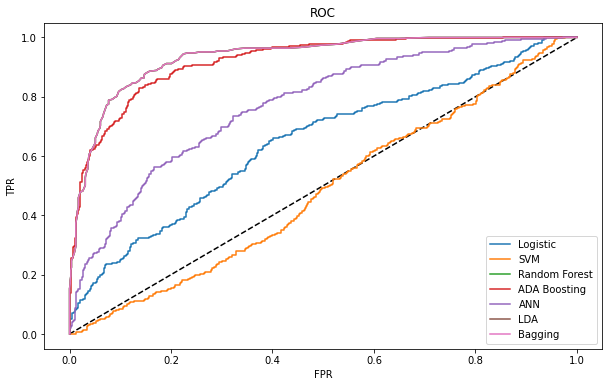

In [183]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc


#Logistic Regression
Y1_pred_prob1 = model1.predict_proba(X1_test)[:,1]
fprlog1, tprlog1, thresholds1 = roc_curve(Y1_test.astype(int), Y1_pred_prob1)
roc_auc1 = auc(fprlog1, tprlog1)

#SVM
Y1_pred_prob_SVM1 = SVM1.predict_proba(X1_test)[:,1]
fprSVM1, tprSVM1, thresholdsSVM1 = roc_curve(Y1_test.astype(int),Y1_pred_prob_SVM1)
roc_aucSVM1 = auc(fprSVM1, tprSVM1)

#Random Forest
Y1_pred_prob_RAND1 = r_clf1.predict_proba(X1_test)[:,1]
fprRAND1, tprRAND1, thresholdsRAND1 = roc_curve(Y1_test.astype(int), Y1_pred_prob_RAND1)
roc_aucRAND1 = auc(fprRAND1, tprRAND1)

#ADA Boosting
Y1_pred_prob_ADA1 = ADAB_clf1.predict_proba(X1_test)[:,1]
fprADA1, tprADA1, thresholdsADA1 = roc_curve(Y1_test.astype(int), Y1_pred_prob_ADA1)
roc_aucADA1 = auc(fprADA1, tprADA1)

#Artificial Neural Network
Y1_pred_prob_ANN1 =  ANN_clf1.predict_proba(X1_test)[:,1]
fprANN1, tprANN1, thresholdsANN1 = roc_curve(Y1_test.astype(int), Y1_pred_prob_ANN1)
roc_aucANN1 = auc(fprANN1, tprANN1)

#Linear Discriminant Analysis
Y1_pred_prob_LDA1 = LDA1.predict_proba(X1_test)[:,1]
fprLDA1, tprLDA1, thresholdsLDA1 = roc_curve(Y1_test.astype(int),Y1_pred_prob_RAND1)
roc_aucLDA1 = auc(fprLDA1, tprLDA1)

#Bagging
Y1_pred_prob_BAG1 = bag1.predict_proba(X1_test)[:,1]
fprBAG1, tprBAG1, thresholdsBAG1 = roc_curve(Y1_test.astype(int), Y1_pred_prob_RAND1)
roc_aucBAG1 = auc(fprBAG1, tprBAG1)

plt.figure(figsize=(10,6))
plt.plot([0,1],[0,1], 'k--')
plt.plot(fprlog1, tprlog1, label= "Logistic")
plt.plot(fprSVM1, tprSVM1, label= "SVM")
plt.plot(fprRAND1, tprRAND1, label= "Random Forest")
plt.plot(fprADA1, tprADA1, label= "ADA Boosting")
plt.plot(fprANN1, tprANN1, label= "ANN")
plt.plot(fprLDA1, tprLDA1, label= "LDA")
plt.plot(fprBAG1, tprBAG1, label= "Bagging")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('ROC')
plt.show()

# WITH EXTRA VARIABLES

In [158]:
X11 = data[['liquidity(X1)', 'profitability(X2)','productivity(X3)','leverage(X4)',"assetturnover(X5)",'operationalmargin(OM)',
            'growthassets(GA)','growthsales(GS)','growthemployees(GE)','CROE', 'CPB','current_ratio','debttoequity','dscr','cashtocurentassets']]
Y11 = data['class']

<AxesSubplot:>

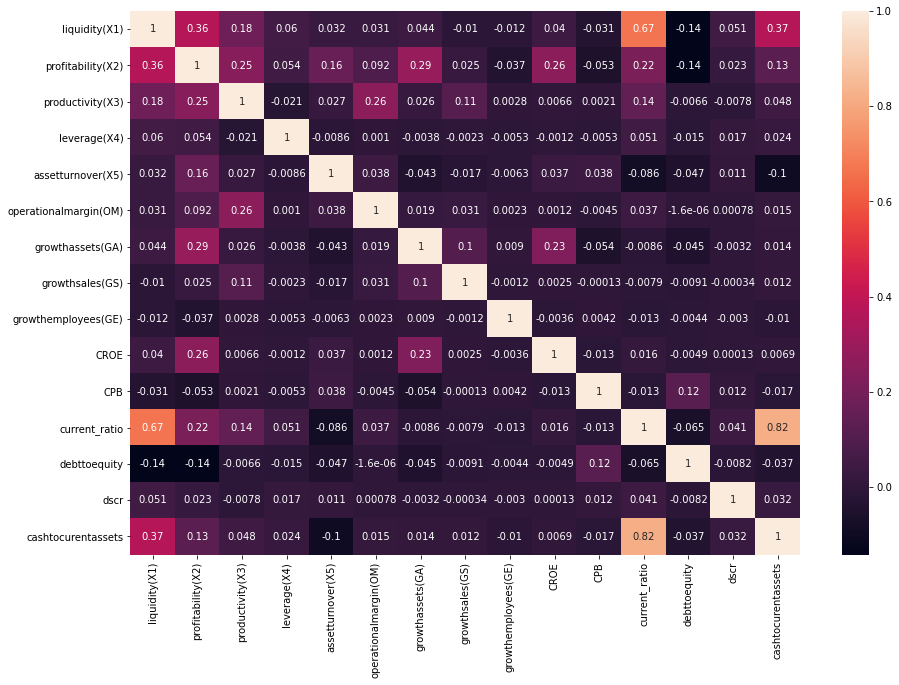

In [159]:
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.heatmap(X11.corr(), annot=True)

In [160]:
from sklearn.model_selection import train_test_split
X11_train, X11_test, Y11_train, Y11_test = train_test_split(X11,Y11, test_size=.3, random_state=42)
X11_train.shape, X11_test.shape, Y11_train.shape, Y11_test.shape

((2597, 15), (1113, 15), (2597,), (1113,))

In [161]:
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix

#Logistic regression
from sklearn.linear_model import LogisticRegression
model11 = LogisticRegression()
model11.fit(X11_train,Y11_train)
predictions_logreg11 = model11.predict(X11_test)

print('Accuracy of logistic regression classifier1 on test set: {:.2f}'.format(model11.score(X11_test, Y11_test)*100))

#Confusion Matrix
Confusion_Matrix_Log_Reg11= confusion_matrix(Y11_test, predictions_logreg11)
print('confusion matrix of Logistic Regression1:')
print(Confusion_Matrix_Log_Reg11)

sensitivity = Confusion_Matrix_Log_Reg11[0,0]/(Confusion_Matrix_Log_Reg11[0,0]+Confusion_Matrix_Log_Reg11[0,1])
print('Sensitivity : ', sensitivity )

specificity = Confusion_Matrix_Log_Reg11[1,1]/(Confusion_Matrix_Log_Reg11[1,0]+Confusion_Matrix_Log_Reg11[1,1])
print('Specificity : ', specificity)


from sklearn.metrics import classification_report
#Classification Report
print(classification_report(Y11_test,predictions_logreg11))


Accuracy of logistic regression classifier1 on test set: 73.14
confusion matrix of Logistic Regression1:
[[783  23]
 [276  31]]
Sensitivity :  0.9714640198511166
Specificity :  0.10097719869706841
              precision    recall  f1-score   support

           0       0.74      0.97      0.84       806
           1       0.57      0.10      0.17       307

    accuracy                           0.73      1113
   macro avg       0.66      0.54      0.51      1113
weighted avg       0.69      0.73      0.66      1113



In [162]:
from sklearn.svm import SVC
SVM11 = SVC(kernel = 'rbf', random_state = 1, probability=True)
SVM11.fit(X11_train, Y11_train)

predictions_SVM11 = SVM11.predict(X11_test)


print('Accuracy of SVM11 on test set:{:.2f}'.format(SVM11.score(X11_test, Y11_test)*100))

#Confusion Matrix
Confusion_Matrix_SVM11 = confusion_matrix(Y11_test, predictions_SVM11)
print('confusion matrix of SVM11:')
print(Confusion_Matrix_SVM11)


sensitivity = Confusion_Matrix_SVM11[0,0]/(Confusion_Matrix_SVM11[0,0]+Confusion_Matrix_SVM11[0,1])
print('Sensitivity : ', sensitivity )

specificity = Confusion_Matrix_SVM11[1,1]/(Confusion_Matrix_SVM11[1,0]+Confusion_Matrix_SVM11[1,1])
print('Specificity : ', specificity)



from sklearn.metrics import classification_report

#Classification Report
print(classification_report(Y11_test,predictions_SVM11))

Accuracy of SVM11 on test set:72.42
confusion matrix of SVM11:
[[806   0]
 [307   0]]
Sensitivity :  1.0
Specificity :  0.0
              precision    recall  f1-score   support

           0       0.72      1.00      0.84       806
           1       0.00      0.00      0.00       307

    accuracy                           0.72      1113
   macro avg       0.36      0.50      0.42      1113
weighted avg       0.52      0.72      0.61      1113



In [163]:
from sklearn.tree import DecisionTreeClassifier
dtree11 = DecisionTreeClassifier()
dtree11.fit(X11_train, Y11_train)

predictions_dtree11= dtree11.predict(X11_test)
predictions_dtree11

print('Accuracy of Decision Trees 11 on test set: {:.2f}'.format(dtree11.score(X11_test, Y11_test)*100))


#Confusion Matrix
Confusion_Matrix_dtree11= confusion_matrix(Y11_test, predictions_dtree11)
print('confusion matrix of Decision Trees 11:')
print(Confusion_Matrix_dtree11)

#Specificity & Sensitivity

sensitivity = Confusion_Matrix_dtree11[0,0]/(Confusion_Matrix_dtree11[0,0]+Confusion_Matrix_dtree11[0,1])
print('Sensitivity : ', sensitivity )

specificity = Confusion_Matrix_dtree11[1,1]/(Confusion_Matrix_dtree11[1,0]+Confusion_Matrix_dtree11[1,1])
print('Specificity : ', specificity)

from sklearn.metrics import classification_report

#Classification Report
print(classification_report(Y11_test,predictions_dtree11))

Accuracy of Decision Trees 11 on test set: 82.57
confusion matrix of Decision Trees 11:
[[702 104]
 [ 90 217]]
Sensitivity :  0.8709677419354839
Specificity :  0.7068403908794788
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       806
           1       0.68      0.71      0.69       307

    accuracy                           0.83      1113
   macro avg       0.78      0.79      0.78      1113
weighted avg       0.83      0.83      0.83      1113



In [164]:
from sklearn.ensemble import RandomForestClassifier

r_clf11 = RandomForestClassifier(n_estimators=100)
r_clf11.fit(X11_train, Y11_train)

predictions_r_clf11= r_clf11.predict(X11_test)
predictions_r_clf11

print('Accuracy of Random Forest 11 on test set: {:.2f}'.format(r_clf11.score(X11_test, Y11_test)*100))


#Confusion Matrix
Confusion_Matrix_r_clf11= confusion_matrix(Y11_test, predictions_r_clf11)
print('confusion matrix of 1 Random Classifier:')
print(Confusion_Matrix_r_clf11)

#Specificity & Sensitivity

sensitivity = Confusion_Matrix_r_clf11[0,0]/(Confusion_Matrix_r_clf11[0,0]+Confusion_Matrix_r_clf11[0,1])
print('Sensitivity : ', sensitivity )

specificity = Confusion_Matrix_r_clf11[1,1]/(Confusion_Matrix_r_clf11[1,0]+Confusion_Matrix_r_clf11[1,1])
print('Specificity : ', specificity)

from sklearn.metrics import classification_report

#Classification Report
print(classification_report(Y11_test,predictions_r_clf11))

Accuracy of Random Forest 11 on test set: 88.14
confusion matrix of 1 Random Classifier:
[[746  60]
 [ 72 235]]
Sensitivity :  0.9255583126550868
Specificity :  0.7654723127035831
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       806
           1       0.80      0.77      0.78       307

    accuracy                           0.88      1113
   macro avg       0.85      0.85      0.85      1113
weighted avg       0.88      0.88      0.88      1113



In [165]:
from sklearn.ensemble import AdaBoostClassifier

ADAB_clf11 = AdaBoostClassifier(n_estimators=100)
ADAB_clf11.fit(X11_train, Y11_train)

predictions_ADAB_clf11= ADAB_clf11.predict(X11_test)
predictions_ADAB_clf11

print('Accuracy of AdaBoost Classifier 11 on test set: {:.2f}'.format(ADAB_clf11.score(X11_test, Y11_test)*100))


#Confusion Matrix
Confusion_Matrix_ADAB_clf11= confusion_matrix(Y11_test, predictions_ADAB_clf11)
print('confusion matrix of AdaBoost Classifier 1:')
print(Confusion_Matrix_ADAB_clf11)

#Specificity & Sensitivity

sensitivity = Confusion_Matrix_ADAB_clf11[0,0]/(Confusion_Matrix_ADAB_clf11[0,0]+Confusion_Matrix_ADAB_clf11[0,1])
print('Sensitivity : ', sensitivity )

specificity = Confusion_Matrix_ADAB_clf11[1,1]/(Confusion_Matrix_ADAB_clf11[1,0]+Confusion_Matrix_ADAB_clf11[1,1])
print('Specificity : ', specificity)

from sklearn.metrics import classification_report

#Classification Report
print(classification_report(Y11_test,predictions_ADAB_clf11))

Accuracy of AdaBoost Classifier 11 on test set: 86.52
confusion matrix of AdaBoost Classifier 1:
[[737  69]
 [ 81 226]]
Sensitivity :  0.9143920595533499
Specificity :  0.7361563517915309
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       806
           1       0.77      0.74      0.75       307

    accuracy                           0.87      1113
   macro avg       0.83      0.83      0.83      1113
weighted avg       0.86      0.87      0.86      1113



In [166]:
import xgboost as xgb


XGB_clf11 = xgb.XGBClassifier(n_estimators=100)
XGB_clf11.fit(X11_train, Y11_train)

predictions_XGB_clf11= XGB_clf11.predict(X11_test)
predictions_XGB_clf11

print('Accuracy of XGBoost Classifier11 on test set: {:.2f}'.format(XGB_clf11.score(X11_test, Y11_test)*100))


#Confusion Matrix
Confusion_Matrix_XGB_clf11= confusion_matrix(Y11_test, predictions_XGB_clf11)
print('confusion matrix of XGBBoost Classifier11:')
print(Confusion_Matrix_XGB_clf11)

#Specificity & Sensitivity

sensitivity = Confusion_Matrix_XGB_clf11[0,0]/(Confusion_Matrix_XGB_clf11[0,0]+Confusion_Matrix_XGB_clf11[0,1])
print('Sensitivity : ', sensitivity )

specificity = Confusion_Matrix_XGB_clf11[1,1]/(Confusion_Matrix_XGB_clf11[1,0]+Confusion_Matrix_XGB_clf11[1,1])
print('Specificity : ', specificity)

from sklearn.metrics import classification_report

#Classification Report
print(classification_report(Y11_test,predictions_XGB_clf11))

Accuracy of XGBoost Classifier11 on test set: 87.33
confusion matrix of XGBBoost Classifier11:
[[744  62]
 [ 79 228]]
Sensitivity :  0.9230769230769231
Specificity :  0.742671009771987
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       806
           1       0.79      0.74      0.76       307

    accuracy                           0.87      1113
   macro avg       0.85      0.83      0.84      1113
weighted avg       0.87      0.87      0.87      1113



In [176]:
#ANN

from sklearn.neural_network import MLPClassifier

ANN_clf11 = MLPClassifier(hidden_layer_sizes=(15,15,15),activation='relu', solver='adam')
ANN_clf11.fit(X11_train, Y11_train)

predictions_ANN_clf11= ANN_clf11.predict(X11_test)
predictions_ANN_clf11

print('Accuracy of ANN Classifier11 on test set: {:.2f}'.format(ANN_clf11.score(X11_test, Y11_test)*100))


#Confusion Matrix
Confusion_Matrix_ANN_clf11= confusion_matrix(Y11_test, predictions_ANN_clf11)
print('confusion matrix of ANN Classifier11:')
print(Confusion_Matrix_ANN_clf11)

#Specificity & Sensitivity

sensitivity = Confusion_Matrix_ANN_clf11[0,0]/(Confusion_Matrix_ANN_clf11[0,0]+Confusion_Matrix_ANN_clf11[0,1])
print('Sensitivity : ', sensitivity )

specificity = Confusion_Matrix_ANN_clf11[1,1]/(Confusion_Matrix_ANN_clf11[1,0]+Confusion_Matrix_ANN_clf11[1,1])
print('Specificity : ', specificity)

from sklearn.metrics import classification_report

#Classification Report
print(classification_report(Y11_test,predictions_ANN_clf11))

Accuracy of ANN Classifier11 on test set: 75.38
confusion matrix of ANN Classifier11:
[[677 129]
 [145 162]]
Sensitivity :  0.8399503722084367
Specificity :  0.5276872964169381
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       806
           1       0.56      0.53      0.54       307

    accuracy                           0.75      1113
   macro avg       0.69      0.68      0.69      1113
weighted avg       0.75      0.75      0.75      1113



In [169]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA11 = LinearDiscriminantAnalysis()
LDA11.fit(X11_train, Y11_train)

predictions_LDA11= LDA11.predict(X11_test)
predictions_LDA11

print('Accuracy of LDA11 on test set: {:.2f}'.format(LDA11.score(X11_test, Y11_test)*100))


#Confusion Matrix
Confusion_Matrix_LDA11= confusion_matrix(Y11_test, predictions_LDA11)
print('confusion matrix of LDA Classifier11:')
print(Confusion_Matrix_LDA11)

#Specificity & Sensitivity

sensitivity = Confusion_Matrix_LDA11[0,0]/(Confusion_Matrix_LDA11[0,0]+Confusion_Matrix_LDA11[0,1])
print('Sensitivity : ', sensitivity )

specificity = Confusion_Matrix_LDA11[1,1]/(Confusion_Matrix_LDA11[1,0]+Confusion_Matrix_LDA11[1,1])
print('Specificity : ', specificity)

from sklearn.metrics import classification_report

#Classification Report
print(classification_report(Y11_test,predictions_LDA11))

Accuracy of LDA11 on test set: 79.07
confusion matrix of LDA Classifier11:
[[787  19]
 [214  93]]
Sensitivity :  0.9764267990074442
Specificity :  0.30293159609120524
              precision    recall  f1-score   support

           0       0.79      0.98      0.87       806
           1       0.83      0.30      0.44       307

    accuracy                           0.79      1113
   macro avg       0.81      0.64      0.66      1113
weighted avg       0.80      0.79      0.75      1113



In [172]:
from sklearn.ensemble import BaggingClassifier
bag11 = BaggingClassifier()
bag11.fit(X11_train, Y11_train)

predictions_BAG_clf11= bag11.predict(X11_test)
predictions_BAG_clf11

print('Accuracy of Bagging Classifier11 on test set: {:.2f}'.format(bag11.score(X11_test, Y11_test)*100))


#Confusion Matrix
Confusion_Matrix_bag_clf11= confusion_matrix(Y11_test, predictions_BAG_clf11)
print('confusion matrix of Bagging Classifier11:')
print(Confusion_Matrix_bag_clf11)

#Specificity & Sensitivity

sensitivity = Confusion_Matrix_bag_clf11[0,0]/(Confusion_Matrix_bag_clf11[0,0]+Confusion_Matrix_bag_clf11[0,1])
print('Sensitivity : ', sensitivity )

specificity = Confusion_Matrix_bag_clf11[1,1]/(Confusion_Matrix_bag_clf11[1,0]+Confusion_Matrix_bag_clf11[1,1])
print('Specificity : ', specificity)

from sklearn.metrics import classification_report

#Classification Report
print(classification_report(Y11_test,predictions_BAG_clf11))

Accuracy of Bagging Classifier11 on test set: 87.33
confusion matrix of Bagging Classifier11:
[[751  55]
 [ 86 221]]
Sensitivity :  0.9317617866004962
Specificity :  0.7198697068403909
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       806
           1       0.80      0.72      0.76       307

    accuracy                           0.87      1113
   macro avg       0.85      0.83      0.84      1113
weighted avg       0.87      0.87      0.87      1113



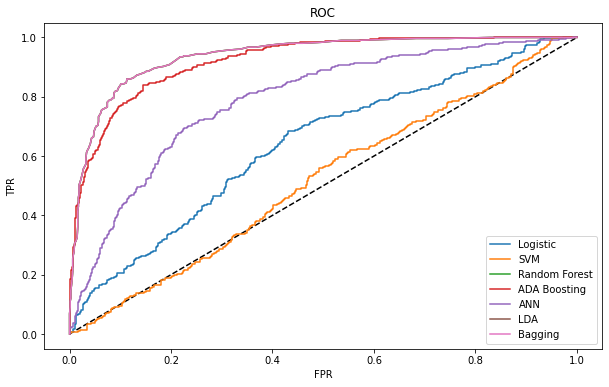

In [177]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc


#Logistic Regression
Y11_pred_prob11 = model11.predict_proba(X11_test)[:,1]
fprlog11, tprlog11, thresholds11 = roc_curve(Y11_test.astype(int), Y11_pred_prob11)
roc_auc11 = auc(fprlog11, tprlog11)

#SVM
Y11_pred_prob_SVM11 = SVM11.predict_proba(X11_test)[:,1]
fprSVM11, tprSVM11, thresholdsSVM11 = roc_curve(Y11_test.astype(int),Y11_pred_prob_SVM11)
roc_aucSVM11 = auc(fprSVM11, tprSVM11)

#Random Forest
Y11_pred_prob_RAND11 = r_clf11.predict_proba(X11_test)[:,1]
fprRAND11, tprRAND11, thresholdsRAND11 = roc_curve(Y11_test.astype(int), Y11_pred_prob_RAND11)
roc_aucRAND11 = auc(fprRAND11, tprRAND11)

#ADA Boosting
Y11_pred_prob_ADA11 = ADAB_clf11.predict_proba(X11_test)[:,1]
fprADA11, tprADA11, thresholdsADA11 = roc_curve(Y11_test.astype(int), Y11_pred_prob_ADA11)
roc_aucADA11 = auc(fprADA11, tprADA11)

#Artificial Neural Network
Y11_pred_prob_ANN11 =  ANN_clf11.predict_proba(X11_test)[:,1]
fprANN11, tprANN11, thresholdsANN11 = roc_curve(Y11_test.astype(int), Y11_pred_prob_ANN11)
roc_aucANN11 = auc(fprANN11, tprANN11)

#Linear Discriminant Analysis
Y11_pred_prob_LDA11 = LDA11.predict_proba(X11_test)[:,1]
fprLDA11, tprLDA11, thresholdsLDA11 = roc_curve(Y11_test.astype(int),Y11_pred_prob_RAND11)
roc_aucLDA11 = auc(fprLDA11, tprLDA11)

#Bagging
Y11_pred_prob_BAG11 = bag11.predict_proba(X11_test)[:,1]
fprBAG11, tprBAG11, thresholdsBAG11 = roc_curve(Y11_test.astype(int), Y11_pred_prob_RAND11)
roc_aucBAG11 = auc(fprBAG11, tprBAG11)

plt.figure(figsize=(10,6))
plt.plot([0,1],[0,1], 'k--')
plt.plot(fprlog11, tprlog11, label= "Logistic")
plt.plot(fprSVM11, tprSVM11, label= "SVM")
plt.plot(fprRAND11, tprRAND11, label= "Random Forest")
plt.plot(fprADA11, tprADA11, label= "ADA Boosting")
plt.plot(fprANN11, tprANN11, label= "ANN")
plt.plot(fprLDA11, tprLDA11, label= "LDA")
plt.plot(fprBAG11, tprBAG11, label= "Bagging")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('ROC')
plt.show()